In [981]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_train = pd.read_csv('train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [982]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [983]:
df_train.shape

(2000, 21)

In [984]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [985]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [986]:
for fitur in df_train.keys():
  if fitur=='price_range':
    continue
  else:
    Q1_fitur = df_train[fitur].quantile(0.25)
    Q3_fitur = df_train[fitur].quantile(0.75)
    IQR_fitur = Q3_fitur - Q1_fitur
    lower_bound_fitur = Q1_fitur - 1.5 * IQR_fitur
    upper_bound_fitur = Q3_fitur + 1.5 * IQR_fitur
    outliers_fitur = df_train[(df_train[fitur] < lower_bound_fitur) | (df_train[fitur] > upper_bound_fitur)]

    print("Outliers detected using IQR for {}:".format(fitur))
    print(outliers_fitur1)

Outliers detected using IQR for battery_power:
Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Outliers detected using IQR for blue:
Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Outliers detected using IQR for clock_speed:
Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Outliers detected using IQR for dual_sim:
Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g,

In [987]:
X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

In [988]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [989]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

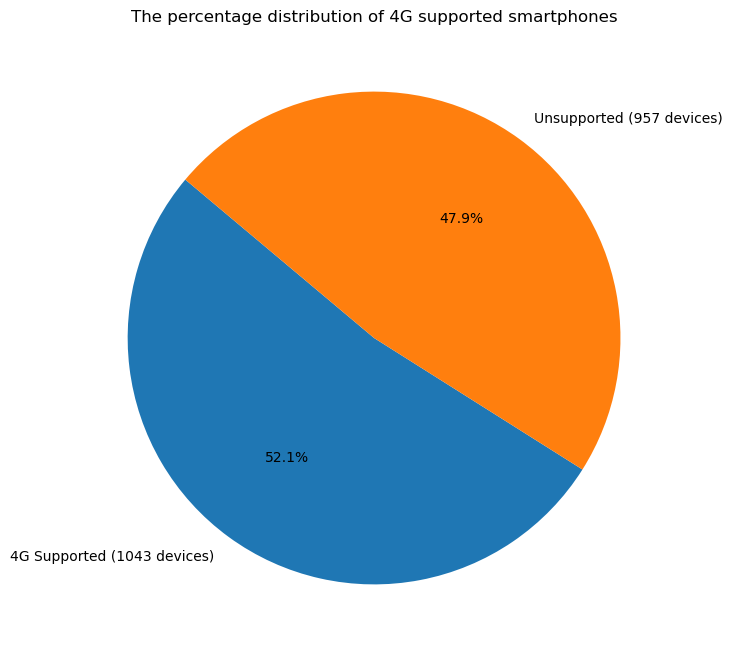

In [990]:
has_4g_value_counts = X["four_g"].value_counts()
has_4g = []
has_4g_count = []

for label, count in has_4g_value_counts.items():
    if label == 1:
        custom_label = "4G Supported ({} devices)".format(count)
    else:
        custom_label = "Unsupported ({} devices)".format(count)

    has_4g.append(custom_label)
    has_4g_count.append(count)

plt.figure(figsize=(8, 8))
plt.pie(has_4g_count, labels=has_4g, autopct='%1.1f%%', startangle=140)
plt.title('The percentage distribution of 4G supported smartphones')
plt.show()

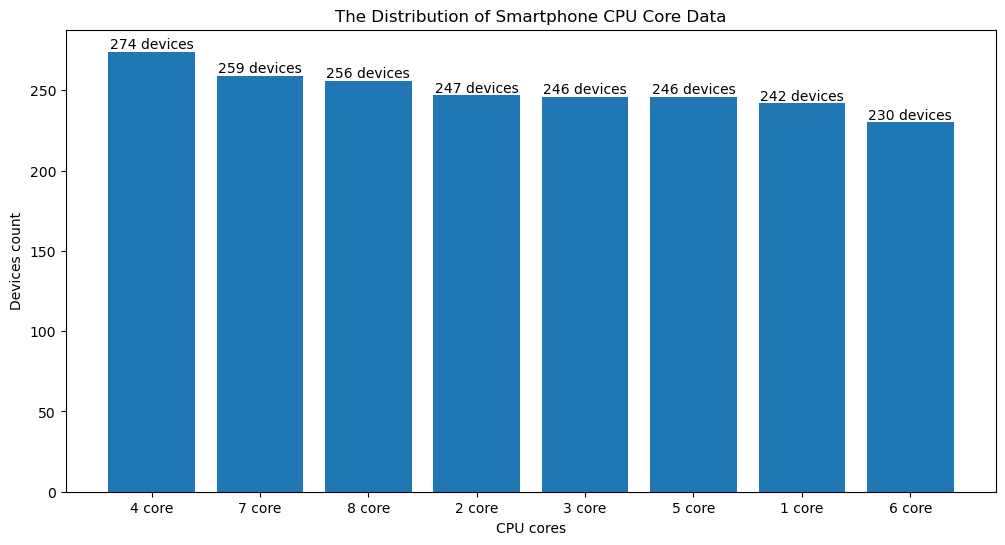

In [991]:
n_cores_counts = X["n_cores"].value_counts()
n_cores_labels = []
n_cores_item_counts = []

for label, count in n_cores_counts.items():
    n_cores_labels.append("{} core".format(label))
    n_cores_item_counts.append(count)

plt.figure(figsize=(12, 6))
    
plt.bar(n_cores_labels, n_cores_item_counts)

for i, value in enumerate(n_cores_item_counts):
    plt.text(i, value, "{} devices".format(value), ha='center', va='bottom')
    

plt.xlabel('CPU cores')
plt.ylabel('Devices count')
plt.title('The Distribution of Smartphone CPU Core Data')

plt.show()

Label: < Rp1jt, Count: 500 devices
Label: Rp1jt dan < Rp3jt, Count: 500 devices
Label: Rp3jt dan < Rp5jt, Count: 500 devices
Label: > Rp5jt, Count: 500 devices


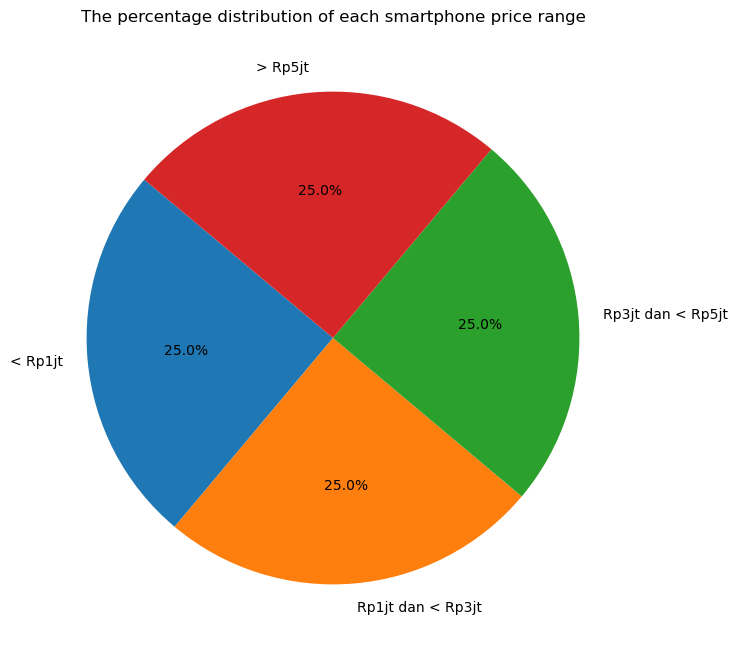

In [992]:
value_counts = y.value_counts()

prices_range = []
devices_count = []

for label, count in value_counts.items():
    price = ""
    if label == 1:
        price = "< Rp1jt"
    elif label == 2:
        price = "Rp1jt dan < Rp3jt"
    elif label == 3:
        price = "Rp3jt dan < Rp5jt"
    else:
        price = "> Rp5jt"

    prices_range.append(price)
    devices_count.append(count)

    print(f"Label: {price}, Count: {count} devices")


plt.figure(figsize=(8, 8))
plt.pie(devices_count, labels=prices_range, autopct='%1.1f%%', startangle=140)
plt.title('The percentage distribution of each smartphone price range')
plt.show()

In [993]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [994]:
print(f'Total numbers of sample in whole dataset: {len(df_train.index)}')
print(f'Total numbers of sample in train dataset: {len(X_train.index)}')
print(f'Total numbers of sample in test dataset: {len(X_test.index)}')

Total numbers of sample in whole dataset: 2000
Total numbers of sample in train dataset: 1600
Total numbers of sample in test dataset: 400


In [995]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1
790,911,1,2.9,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,0,1,0
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,1,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,1,0,0
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,1,0


In [996]:
y_train

0       1
816     0
790     0
361     0
592     1
       ..
1791    0
1096    3
1932    1
235     0
1061    1
Name: price_range, Length: 1600, dtype: int64

In [997]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


In [998]:
y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

In [999]:
y_test.value_counts()

2    106
3    106
1     96
0     92
Name: price_range, dtype: int64

In [1000]:
for label in y_test.value_counts():
    print(f"label {label}")

label 106
label 106
label 96
label 92


In [1001]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1002]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 3, 2, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 3, 0, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 2, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 3, 2, 1,
       0, 2, 1, 0, 3, 2, 3, 1, 2, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 1, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 2, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 2, 3, 3, 3, 2,

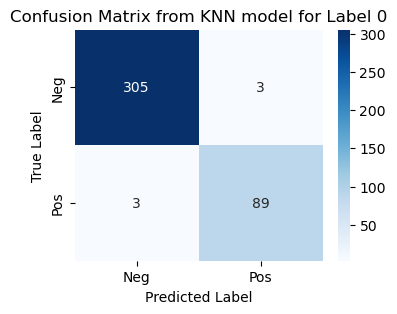

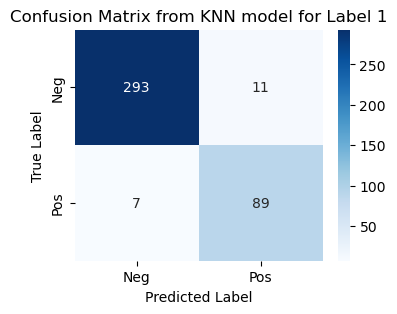

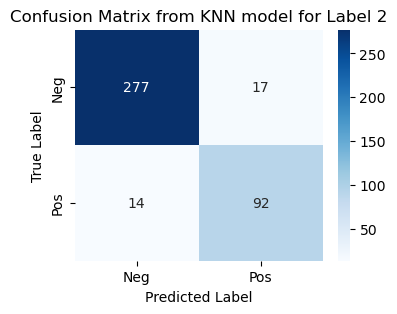

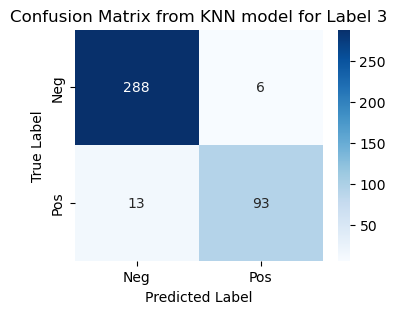

In [1003]:
from sklearn.utils.multiclass import unique_labels

confusion_matrices = {}
unique_labels = unique_labels(y_test, y_pred_label)

for label in unique_labels:
    y_true_label = (y_test == label)
    y_pred_label = (model.predict(X_test) == label)
    
    cm_label = confusion_matrix(y_true_label, y_pred_label)
    
    confusion_matrices[label] = cm_label

for label, cm in confusion_matrices.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix from KNN model for Label {label}')
    plt.show()

In [1004]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [1005]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 3, 2, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 3, 0, 3, 3, 1, 2, 0, 1, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 2, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 0, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 1, 3, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1,
       0, 1, 2, 1, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 1, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 2, 3, 0, 1, 1, 3, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

In [1006]:
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        92
           1       0.80      0.85      0.83        96
           2       0.81      0.79      0.80       106
           3       0.90      0.86      0.88       106

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [1007]:
dt_ac = accuracy_score(y_test, y_pred)
dt_ac

0.8525

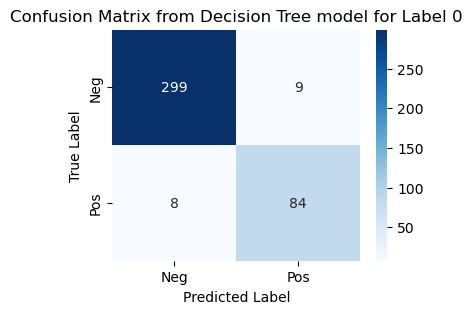

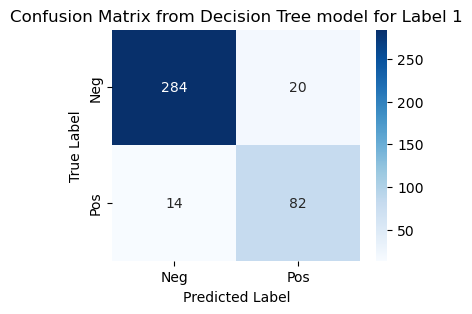

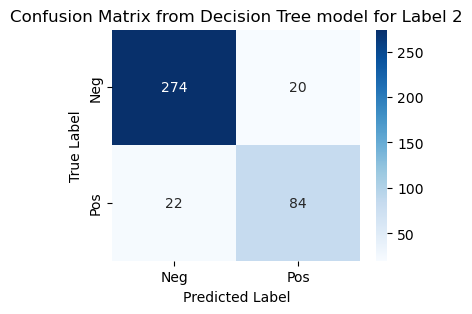

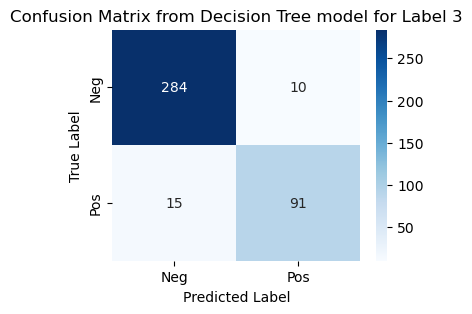

In [1008]:
from sklearn.utils.multiclass import unique_labels

confusion_matrices = {}
unique_labels = unique_labels(y_test, y_pred_label)

for label in unique_labels:
    y_true_label = (y_test == label)
    y_pred_label = (model.predict(X_test) == label)
    
    cm_label = confusion_matrix(y_true_label, y_pred_label)
    
    confusion_matrices[label] = cm_label

for label, cm in confusion_matrices.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix from Decision Tree model for Label {label}')
    plt.show()

In [1009]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [1010]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 3, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 3, 0,
       2, 1, 3, 0, 1, 2, 1, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 2, 2, 3, 1, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1,
       0, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 2, 3,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 1, 0, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 1,

In [1011]:
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        92
           1       0.65      0.69      0.67        96
           2       0.65      0.68      0.67       106
           3       0.87      0.81      0.84       106

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



In [1012]:
lr_ac = accuracy_score(y_test, y_pred)
lr_ac

0.7575

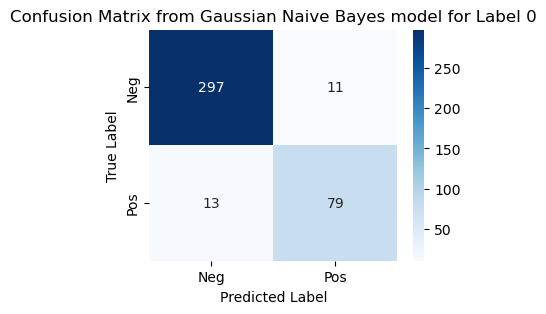

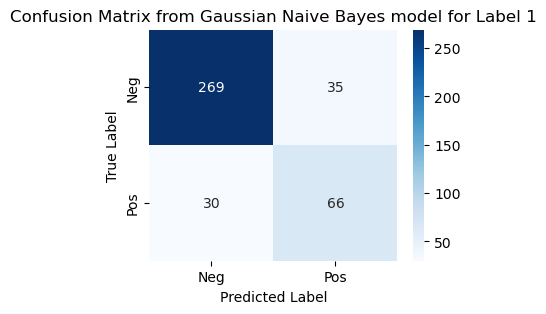

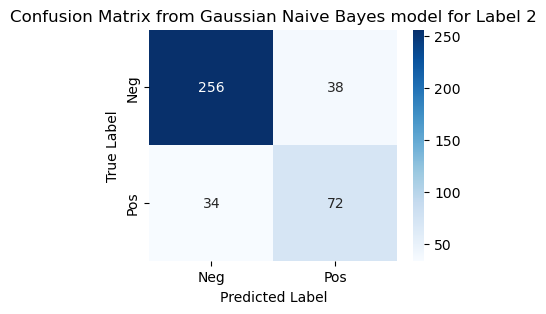

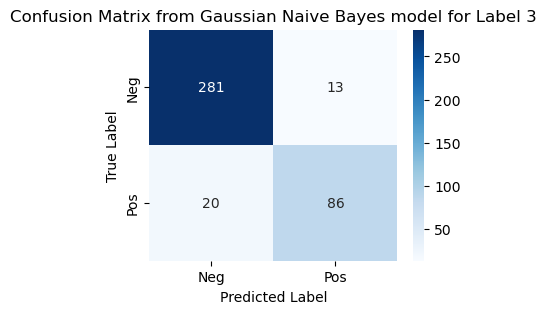

In [1013]:
from sklearn.utils.multiclass import unique_labels

confusion_matrices = {}
unique_labels = unique_labels(y_test, y_pred_label)

for label in unique_labels:
    y_true_label = (y_test == label)
    y_pred_label = (model.predict(X_test) == label)
    
    cm_label = confusion_matrix(y_true_label, y_pred_label)
    
    confusion_matrices[label] = cm_label

for label, cm in confusion_matrices.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix from Gaussian Naive Bayes model for Label {label}')
    plt.show()

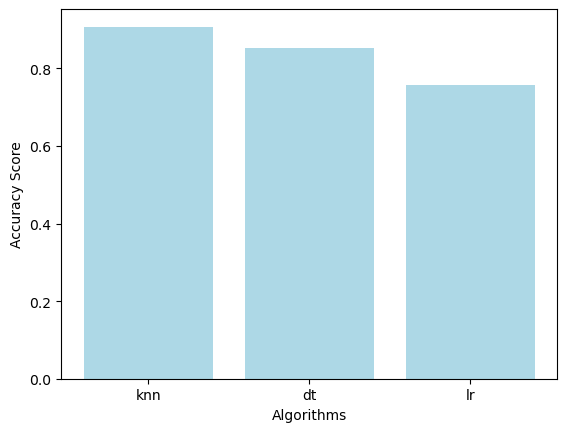

In [1014]:
import matplotlib.pyplot as plt2

plt2.bar(x=['knn', 'dt', 'lr'], height=[knn_ac, dt_ac, lr_ac], color='lightblue')
plt2.xlabel('Algorithms')
plt2.ylabel('Accuracy Score')
plt2.show()